In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Position_Salaries.csv')
X= data.iloc[:,1:2].values
y = data.iloc[:,2].values


In [3]:
# import SVR 
from sklearn.svm import SVR

In [4]:
reg= SVR(kernel='rbf')

In [5]:
#fit data
reg.fit(X,y)

SVR()

In [6]:
# check predicted value of 6.5 level
y_predicted=reg.predict(np.array([6.5]).reshape(-1,1))

In [7]:
y_predicted

array([130001.82883924])

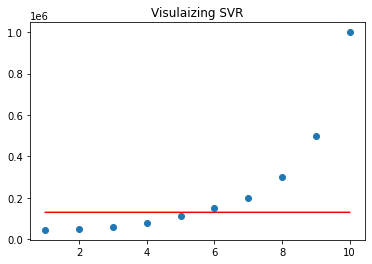

In [8]:
# visualizing results
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Visulaizing SVR')
plt.xlabel='Level'
plt.ylabel='Salary'

In [9]:
# as you can see there is horizontal line in red plotting x and x_predicted and it's like that coz of of  missing scaling 
# so letes mak scalling first and watch what will happen
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
X=sc_x.fit_transform(X)
y=sc_y.fit_transform(y.reshape(-1,1))

In [10]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [11]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [12]:
#fit data
reg.fit(X,y)
# check predicted value of 6.5 level
y_predicted=reg.predict(sc_x.transform(np.array([6.5]).reshape(-1,1)))
y_predicted

C:\Users\Hany-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([-0.27861589])

In [13]:
# as we can seee this is y predicted with scaled value
# so we need to inverse scaling
y_prdeicted_inv=sc_y.inverse_transform(y_predicted)
y_prdeicted_inv

array([170370.0204065])

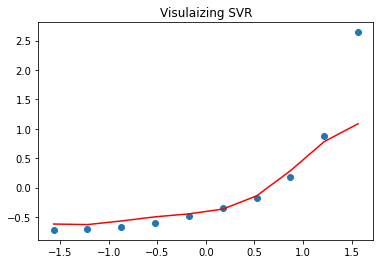

In [14]:
# visualizing results after scaling
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Visulaizing SVR')
plt.xlabel='Level'
plt.ylabel='Salary'